# FiftyOne

In [ ]:
from google.colab import drive

#you will have to change this for your own folder
drive.mount('/content/drive')
%cd /content/drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
!pip install fastai==2.7.10
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 27.3 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 
     |████████████████████████████████| 133 kB 74.7 MB/s 
     |████████████████████████████████| 49 kB 7.2 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 192 kB 72.3 MB/s 
     |████████████████████████████████| 37.8 MB 106 kB/s 
     |████████████████████████████████| 108 kB 83.5 MB/s 
     |████████████████████████████████| 226 kB 85.4 MB/s 
     |████████████████████████████████| 132 kB 69.0 MB/s 
     |████████████████████████████████| 57 kB 6.5 MB/s 
     |████████████████████████████████| 564 kB 80.6 MB/s 
     |████████████████████████████████| 79.9 MB 1.1 MB/s 
     |████████████████████████████████| 80 kB 11.4 MB/s 

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


In [ ]:
import pandas as pd
labels_df = pd.read_csv('data/labels_openimages.csv')
print(labels_df)

def get_label_id_from_openimages_label(label, multiple):
  label_df = labels_df.loc[(labels_df['openimages_label'] == label) & ((labels_df['multiple'] == multiple) | (labels_df['multiple'] == 'NaN'))]
  if label_df.empty:
    return None
  return label_df.iloc[0].label_id

   label_id    object openimages_label multiple
0        l0    people           Person     True
1        l1     trees             Tree     True
2        l2     grass            Grass      NaN
3        l3  building         Building    False
4        l4      snow             Snow      NaN
..      ...       ...              ...      ...
87      l87     stage            Stage      NaN
88      l88      book             Book    False
89      l89     books             Book     True
90      l90      flag             Flag    False
91      l91      pole             Pole      NaN

[92 rows x 4 columns]


In [ ]:
openimages_labels = labels_df[labels_df['openimages_label'].notnull()]
label_names = openimages_labels['openimages_label'].unique().tolist()
label_names

['Person',
 'Tree',
 'Grass',
 'Building',
 'Snow',
 'Water',
 'Road',
 'Car',
 'Nature',
 'Bicycle',
 'Pavement',
 'Flower',
 'Traffic sign',
 'Street light',
 'Winter',
 'Stairs',
 'Cloud',
 'Bridge (structure)',
 'Sand',
 'Street',
 'Graffiti',
 'Bench',
 'Playground',
 'Child',
 'Dog',
 'Christmas lights',
 'Barge',
 'Flag',
 'Tractor',
 'Glass',
 'Shrub (Plant)',
 'Autumn',
 'Fountain',
 'River',
 'Plant',
 'Beach',
 'Fence',
 'Street performance',
 'Construction worker',
 'Park',
 'Wedding',
 'Boat',
 'Airplane',
 'Cat',
 'Railway',
 'Chair',
 'Traffic',
 'Suit',
 'Snowplow',
 'Sign',
 'House',
 'Human hand',
 'Pedestrian crossing',
 'Man',
 'Cone',
 'Light',
 'Suitcase',
 'Snowman',
 'Table',
 'Pencil',
 'Baby carriage',
 'Tent',
 'Stage',
 'Book',
 'Pole']

In [ ]:
dataset = foz.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              label_types=["detections"],
              classes=label_names,
              max_samples=10000
          )

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v6/validation' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/validation/validation-images-with-rotation.csv' to '/root/fiftyone/open-images-v6/validation/metadata/image_ids.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v6/validation/metadata/classes.csv'


Ignoring invalid classes ['Grass', 'Snow', 'Water', 'Road', 'Nature', 'Pavement', 'Winter', 'Cloud', 'Bridge (structure)', 'Sand', 'Street', 'Graffiti', 'Playground', 'Child', 'Christmas lights', 'Tractor', 'Glass', 'Shrub (Plant)', 'Autumn', 'River', 'Beach', 'Fence', 'Street performance', 'Construction worker', 'Park', 'Wedding', 'Railway', 'Traffic', 'Sign', 'Pedestrian crossing', 'Cone', 'Light', 'Pencil', 'Baby carriage', 'Stage', 'Pole']
You can view the available classes via `fiftyone.utils.openimages.get_classes()`


You can view the available classes via `fiftyone.utils.openimages.get_classes()`


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpw8tjoolv/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv' to '/root/fiftyone/open-images-v6/validation/labels/detections.csv'


INFO:fiftyone.utils.openimages:Downloading 10000 images


 100% |███████████████| 10000/10000 [6.9m elapsed, 0s remaining, 23.7 files/s]       


INFO:eta.core.utils: 100% |███████████████| 10000/10000 [6.9m elapsed, 0s remaining, 23.7 files/s]       


Dataset info written to '/root/fiftyone/open-images-v6/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v6/info.json'


Loading 'open-images-v6' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'validation'


Ignoring invalid classes ['Grass', 'Snow', 'Water', 'Road', 'Nature', 'Pavement', 'Winter', 'Cloud', 'Bridge (structure)', 'Sand', 'Street', 'Graffiti', 'Playground', 'Child', 'Christmas lights', 'Tractor', 'Glass', 'Shrub (Plant)', 'Autumn', 'River', 'Beach', 'Fence', 'Street performance', 'Construction worker', 'Park', 'Wedding', 'Railway', 'Traffic', 'Sign', 'Pedestrian crossing', 'Cone', 'Light', 'Pencil', 'Baby carriage', 'Stage', 'Pole']
You can view the available classes via `fiftyone.utils.openimages.get_classes()`


You can view the available classes via `fiftyone.utils.openimages.get_classes()`


 100% |█████████████| 10000/10000 [1.8m elapsed, 0s remaining, 89.2 samples/s]       


INFO:eta.core.utils: 100% |█████████████| 10000/10000 [1.8m elapsed, 0s remaining, 89.2 samples/s]       


Dataset 'open-images-v6-validation-10000' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v6-validation-10000' created


In [ ]:
def get_detections(detections):
  result = {}
  for detection in detections:
    result[detection.label] = result.get(detection.label, 0) + 1
  return result

In [ ]:
# Writing image path & label to list of dicts
dict_list = []
for item in dataset:
  label_dict = {}
  label_list = []
  detections = get_detections(item.detections.detections)
  print(detections)
  for label, count in detections.items():
    label = label.replace(' ', '_')
    multiple = count > 1
    label_id = get_label_id_from_openimages_label(label, multiple)
    if label_id != None:
      label_list.append(label_id)
  if len(label_list) > 0:
    label_dict['image_id'] = item.filepath
    label_dict['labels'] = ' '.join(label_list)
    label_dict['is_valid'] = False
    dict_list.append(label_dict)

{'Airplane': 1}
{'Clothing': 3, 'Human body': 3, 'Mammal': 3, 'Footwear': 6, 'Sports equipment': 12, 'Human arm': 6, 'Man': 3}
{'Trousers': 1, 'Dog': 1, 'Human leg': 2, 'Person': 1, 'Mammal': 1, 'Footwear': 1, 'Human arm': 1}
{'Dog': 1}
{'Dog': 1}
{'Airplane': 1}
{'Person': 4, 'Mammal': 3}
{'Fashion accessory': 2, 'Person': 1, 'Clothing': 1, 'Human body': 2, 'Human hand': 3, 'Human arm': 3, 'Woman': 1, 'Man': 1}
{'Dog': 1}
{'Car': 1, 'Wheel': 2}
{'Trousers': 2, 'Human hair': 1, 'Plant': 1, 'Human leg': 3, 'Girl': 1, 'Clothing': 2, 'Human body': 2, 'Human head': 1, 'Human eye': 1, 'Human hand': 4, 'Human arm': 4, 'Human foot': 2, 'Woman': 1, 'Man': 1}
{'Human face': 2, 'Human hair': 1, 'Human nose': 1, 'Clothing': 5, 'Human body': 1, 'Human head': 2, 'Human hand': 3, 'Auto part': 1, 'Human mouth': 2, 'Boy': 2, 'Human arm': 3, 'Man': 4}
{'Person': 1, 'Table': 1, 'Man': 2}
{'Building': 1, 'Person': 1}
{'Human face': 3, 'Human hair': 2, 'Poster': 1, 'Person': 2, 'Clothing': 3, 'Human body'

KeyboardInterrupt: ignored

In [ ]:
all_label_ids = list(range(0, 92))
all_labels = list(map(lambda id: f"l{id}", all_label_ids))
label_dict = {}
label_dict['image_id'] = 'data/images/dummy.jpg'
label_dict['labels'] = ' '.join(all_labels)
label_dict['is_valid'] = False
dict_list.append(label_dict)

In [ ]:
from os import listdir

def remove_invalid(df):
    file_names = listdir('data/images')
    return df[df['image_id'].isin(file_names)]

In [ ]:
from fastai.vision.all import *

val_df = pd.read_csv('data/train_og.csv')
val_df = remove_invalid(val_df)

for img in val_df.itertuples(index=True):
  label_dict = {}
  label_dict['image_id'] = 'data/images/' + img.image_id
  label_dict['labels'] = img.labels
  label_dict['is_valid'] = True
  dict_list.append(label_dict)

In [ ]:
print(dict_list)

[{'image_id': '/root/fiftyone/open-images-v6/validation/data/0007cebe1b2ba653.jpg', 'labels': 'l8', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v6/validation/data/000a045a0715d64d.jpg', 'labels': 'l0', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v6/validation/data/000a1249af2bc5f0.jpg', 'labels': 'l8', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v6/validation/data/001083f05db4352b.jpg', 'labels': 'l50', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v6/validation/data/00173afdc7581c41.jpg', 'labels': 'l8', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v6/validation/data/001840a807e454c7.jpg', 'labels': 'l3 l8', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v6/validation/data/001997021f01f208.jpg', 'labels': 'l0', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v6/validation/data/001a78754e43abc5.jpg', 'labels': 'l27', 'is_valid': False}, {'image_id': '/root/fiftyone/open-images-v

In [ ]:
# Writing image path & label to csv
import csv

field_names = ['image_id', 'labels', 'is_valid']
csv_file = "fiftyone_1000.csv"
with open(csv_file, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = field_names)
    writer.writeheader()
    writer.writerows(dict_list)

# Processing

In [ ]:
train_df = pd.read_csv('fiftyone_1000.csv')

train_db = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                    splitter=ColSplitter(),
                    get_x=ColReader(0),
                    get_y=ColReader(1, label_delim=' '),
                    item_tfms=Resize(600, 'pad', 'border'), # 224
                    batch_tfms=aug_transforms())
print(train_db)
print(train_df)
dls = train_db.dataloaders(train_df, bs=64)

                                                                image_id  \
0     /root/fiftyone/open-images-v6/validation/data/0007cebe1b2ba653.jpg   
1     /root/fiftyone/open-images-v6/validation/data/000a045a0715d64d.jpg   
2     /root/fiftyone/open-images-v6/validation/data/000a1249af2bc5f0.jpg   
3     /root/fiftyone/open-images-v6/validation/data/001083f05db4352b.jpg   
4     /root/fiftyone/open-images-v6/validation/data/00173afdc7581c41.jpg   
...                                                                  ...   
6472                                              data/images/img105.jpg   
6473                                              data/images/img198.jpg   
6474                                               data/images/img82.jpg   
6475                                              data/images/img124.jpg   
6476                                               data/images/img23.jpg   

                     labels  is_valid  
0                        l8     False  
1      

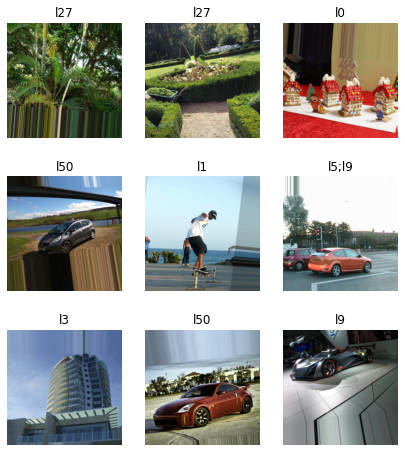

In [ ]:
dls.show_batch(max_n=9, figsize=(7,8))

# FastAI 

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy_multi, loss_func=BCEWithLogitsLossFlat(), splitter=default_split).to_fp16()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy_multi,time


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.780711,0.344696,0.923048,05:11


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.214921,0.185585,0.952412,03:23
1,0.076812,0.217838,0.952736,03:20
2,0.039556,0.235942,0.952953,03:21
3,0.030819,0.249299,0.952953,03:21
4,0.028168,0.257436,0.952358,03:25


# Classification

image_id    img250.jpg
Name: 49, dtype: object


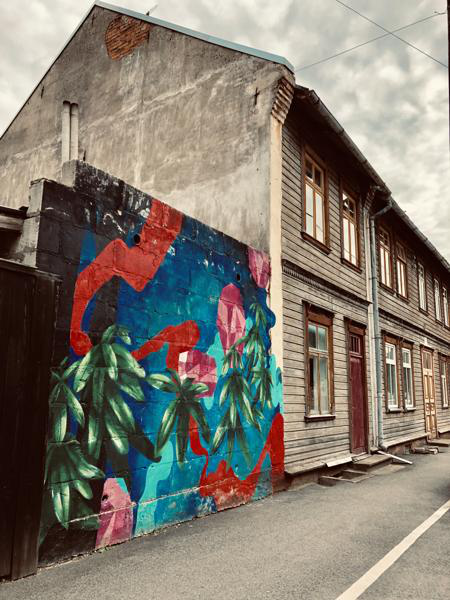

In [18]:
test_df = pd.read_csv('data/test.csv')
img_series = test_df.sample().iloc[0]
img_path = 'data/images/' + img_series['image_id']
img = load_image(img_path)
print(img_series)
img

In [19]:
pred_class,pred_idx,outputs = learn.predict(img_path)
pred_class

(#1) ['l3']

In [20]:
from os import listdir

In [21]:
file_names = listdir('data/images')
for i in test_df.index:
  if test_df.at[i, 'image_id'] in file_names:
    img_path = 'data/images/' + test_df.at[i, 'image_id']
    print(img_path)
    pred_class,pred_idx,outputs = learn.predict(img_path)
    print(pred_class)
    test_df.at[i, 'labels'] = ' '.join(pred_class)
  else:
    test_df.at[i, 'labels'] = ''
print(test_df)

data/images/img102.jpg


['l8']
data/images/img103.jpg


['l27']
data/images/img11.jpg


['l8']
data/images/img113.jpg


['l27']
data/images/img114.jpg


['l27']
data/images/img121.jpg


[]
data/images/img126.jpg


['l0', 'l8']
data/images/img131.jpg


['l0', 'l8']
data/images/img136.jpg


['l8']
data/images/img137.jpg


['l27']
data/images/img139.jpg


['l27']
data/images/img140.jpg


[]
data/images/img15.jpg


['l27']
data/images/img150.jpg


[]
data/images/img151.jpg


[]
data/images/img152.jpg


[]
data/images/img156.jpg


[]
data/images/img161.jpg


[]
data/images/img166.jpg


[]
data/images/img167.jpg


[]
data/images/img170.jpg


[]
data/images/img173.jpg


['l27']
data/images/img176.jpg


['l8']
data/images/img18.jpg


['l27']
data/images/img180.jpg


[]
data/images/img181.jpg


['l27']
data/images/img182.jpg


[]
data/images/img183.jpg


['l27']
data/images/img189.jpg


[]
data/images/img192.jpg


[]
data/images/img194.jpg


['l0']
data/images/img195.jpg


[]
data/images/img206.jpg


['l1']
data/images/img208.jpg


['l27']
data/images/img209.jpg


['l27']
data/images/img211.jpg


['l1', 'l27']
data/images/img212.jpg


['l27']
data/images/img218.jpg


['l27']
data/images/img22.jpg


['l27']
data/images/img221.jpg


[]
data/images/img228.jpg


[]
data/images/img230.jpg


[]
data/images/img231.jpg


[]
data/images/img234.jpg


[]
data/images/img238.jpg


['l0']
data/images/img243.jpg


[]
data/images/img247.jpg


[]
data/images/img248.jpg


[]
data/images/img249.jpg


[]
data/images/img250.jpg


['l3']
data/images/img251.jpg


[]
data/images/img252.jpg


[]
data/images/img257.jpg


[]
data/images/img259.jpg


[]
data/images/img262.jpg


['l8']
data/images/img265.jpg


['l3']
data/images/img266.jpg


['l3']
data/images/img279.jpg


['l3']
data/images/img280.jpg


[]
data/images/img281.jpg


[]
data/images/img292.jpg


[]
data/images/img296.jpg


['l3']
data/images/img3.jpg


[]
data/images/img300.jpg


[]
data/images/img33.jpg


[]
data/images/img37.jpg


[]
data/images/img39.jpg


[]
data/images/img41.jpg


[]
data/images/img42.jpg


[]
data/images/img43.jpg


[]
data/images/img48.jpg


[]
data/images/img49.jpg


[]
data/images/img5.jpg


[]
data/images/img57.jpg


[]
data/images/img59.jpg


[]
data/images/img69.jpg


['l3']
data/images/img71.jpg


['l8']
data/images/img73.jpg


['l8']
data/images/img75.jpg


['l8']
data/images/img79.jpg


[]
data/images/img8.jpg


[]
data/images/img81.jpg


['l27']
data/images/img84.jpg


['l8']
data/images/img90.jpg


['l8']
data/images/img93.jpg


['l8']
data/images/img94.jpg


[]
      image_id labels
0   img102.jpg     l8
1   img103.jpg    l27
2    img11.jpg     l8
3   img113.jpg    l27
4   img114.jpg    l27
..         ...    ...
83   img81.jpg    l27
84   img84.jpg     l8
85   img90.jpg     l8
86   img93.jpg     l8
87   img94.jpg       

[88 rows x 2 columns]
